In [109]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x

# Initial parameters
x0_1 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

def f2(x):
    n = len(x)
    a = -2
    b = 150
    result = 0
    for i in range(n-1):
        term1 = b * (x[i+1]**2 - x[i])**2
        term2 = (x[i] - a)**2
        result += term1 + term2
    return result
#initial parameters

x0_2 = np.array([1, 2])


def gradient(f, x, input_size):
    h = 1e-10
    grad = np.zeros((input_size, 1))
    for i in range(input_size):
        delta = np.zeros((input_size, 1))
        delta[i][0] = h
        grad[i][0] = (f(x + delta) - f(x)) / h
    return grad



def steepset_descent(f , x0,max_iter, tol ,Q):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("Steepset Descent")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step norm (gama)
        grad = gradient(f , x , input_size)
        step = (np.transpose(grad) @ grad)/(np.transpose(grad) @ Q @ grad)
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)



def gradient_descent_constant(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("CONSTANT GAMA STEP SIZE")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step norm (gama)
        step = c /np.linalg.norm(gradient(f, x, input_size))
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

def gradient_descent_alpha(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]
    print("CONSTANT ALPHA STEP SIZE")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = c
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

def gradient_descent_newton(f , x0,max_iter, tol):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]
    print("CONSTANT ALPHA STEP SIZE")
    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = np.linalg.inv(sp.hessian(f, x))
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

CONSTANT GAMA STEP SIZE
Iteration	X Value				Function Value
0		[23 37]		27836.0
1		[22.06190674 36.65361722]	26275.740944887544
2		[21.12502465 36.30397175]	24765.153106212376
3		[20.18945941 35.95081785]	23304.19528369194
4		[19.25530596 35.59394625]	21892.82241787685
5		[18.32266608 35.23313764]	20530.98515141499
6		[17.39167402 34.86809821]	19218.62889667043
7		[16.46248204 34.49850078]	17955.693060760015
8		[15.53522608 34.12407271]	16742.110788504982
9		[14.61008859 33.74444047]	15577.80751017587
10		[13.68727679 33.35918941]	14462.699720893212
11		[12.76702079 32.96787253]	13396.693636708453
12		[11.84958904 32.56997937]	12379.683359822158
13		[10.93531634 32.16488008]	11411.54822539635
14		[10.02454304 31.75197332]	10492.151029378685
15		[ 9.11770269 31.33049902]	9621.334095940996
16		[ 8.21530974 30.89958491]	8798.915020183636
17		[ 7.31798493 30.45821412]	8024.681158231023
18		[ 6.42645913 30.00524419]	7298.38310380732
19		[ 5.54164569 29.53929872]	6619.725304324974
20		[ 4.66

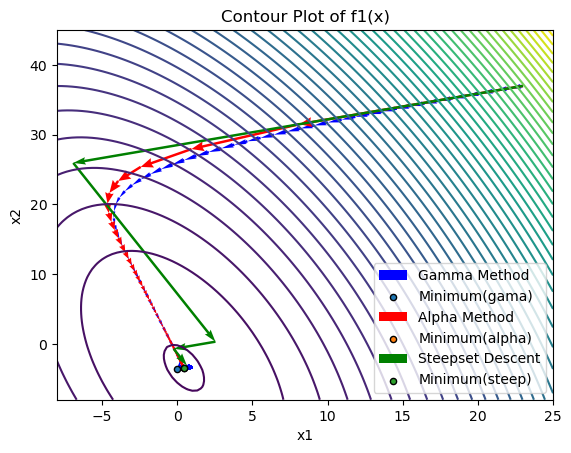

the minimum value with the constant gama method is:
-32.55274329108335
constant gama iteration count 1000
the minimum value with the constant alpha method is:
-32.55633802737127
constant alpha iteration count 253
the minimum value with the Steepset Descent method is:
-32.55633802816514
Steep set descent iteration count 24


In [110]:

#########
# should be fixed
#########


def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')



# Define range for contour plot
x_v = np.linspace(-8, 25, 100)
y_v = np.linspace(-8, 45, 100)
gama=1
alpha = 0.01

plot_contour(Q, np.array([[13], [23]]), 4, x_v, y_v, levels=50)


minimizer_f1_gama, values_f1_gama, x_history_f1_gama = gradient_descent_constant(f1 ,x0_1, 1000, 1e-10,gama)
plt.quiver(x_history_f1_gama[:-1, 0], x_history_f1_gama[:-1, 1], x_history_f1_gama[1:, 0] - x_history_f1_gama[:-1, 0], x_history_f1_gama[1:, 1] - x_history_f1_gama[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=2, label='Gamma Method')
plt.scatter(minimizer_f1_gama[0], minimizer_f1_gama[1], s=20, label='Minimum(gama)', edgecolors='black')

minimizer_f1_alpha, values_f1_alpha, x_history_f1_alpha = gradient_descent_alpha(f1, x0_1, 1000, 1e-10, alpha)
plt.quiver(x_history_f1_alpha[:-1, 0], x_history_f1_alpha[:-1, 1], x_history_f1_alpha[1:, 0] - x_history_f1_alpha[:-1, 0], x_history_f1_alpha[1:, 1] - x_history_f1_alpha[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='red', width=0.005, headwidth=4, label='Alpha Method')
plt.scatter(minimizer_f1_alpha[0], minimizer_f1_alpha[1], s=20, label='Minimum(alpha)', edgecolors='black')

minimizer_f1_steep, values_f1_steep, x_history_f1_steep = steepset_descent(f1, x0_1, 1000, 1e-10, Q)
plt.quiver(x_history_f1_steep[:-1, 0], x_history_f1_steep[:-1, 1], x_history_f1_steep[1:, 0] - x_history_f1_steep[:-1, 0], x_history_f1_steep[1:, 1] - x_history_f1_steep[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='green', width=0.005, headwidth=3, label='Steepset Descent')
plt.scatter(minimizer_f1_steep[0], minimizer_f1_steep[1], s=20, label='Minimum(steep)', edgecolors='black')



plt.legend()

plt.show()

print("the minimum value with the constant gama method is:")
print(np.min(values_f1_gama))
print("constant gama iteration count" , len(x_history_f1_gama))

print("the minimum value with the constant alpha method is:")
print(np.min(values_f1_alpha))
print("constant alpha iteration count" , len(x_history_f1_alpha))

print("the minimum value with the Steepset Descent method is:")
print(np.min(values_f1_steep))
print("Steep set descent iteration count"  , len(x_history_f1_steep))

CONSTANT GAMA STEP SIZE
Iteration	X Value				Function Value
0		[1 2]		1359.0
1		[1.00241013 1.99029478]	1322.24516942546
2		[1.00483109 1.98059226]	1286.162854380613
3		[1.00726299 1.97089247]	1250.7460257894609
4		[1.0097059  1.96119545]	1215.9876905671372
5		[1.01215993 1.95150124]	1181.880891527966
6		[1.01462515 1.94180987]	1148.418707470192
7		[1.01710166 1.93212137]	1115.5942531335268
8		[1.01958956 1.9224358 ]	1083.4006791825964
9		[1.02208893 1.91275318]	1051.8311723005068
10		[1.02459988 1.90307356]	1020.8789550737945
11		[1.0271225  1.89339696]	990.5372861569857
12		[1.02965687 1.88372345]	960.799460146336
13		[1.03220312 1.87405305]	931.658807591726
14		[1.03476133 1.86438581]	903.1086950559479
15		[1.0373316  1.85472176]	875.1425251488299
16		[1.03991403 1.84506096]	847.7537364660236
17		[1.04250871 1.83540345]	820.9358036212464
18		[1.04511577 1.82574926]	794.6822372541134
19		[1.04773529 1.81609846]	768.986584030935
20		[1.05036738 1.80645107]	743.8424266768183
21		[1.053

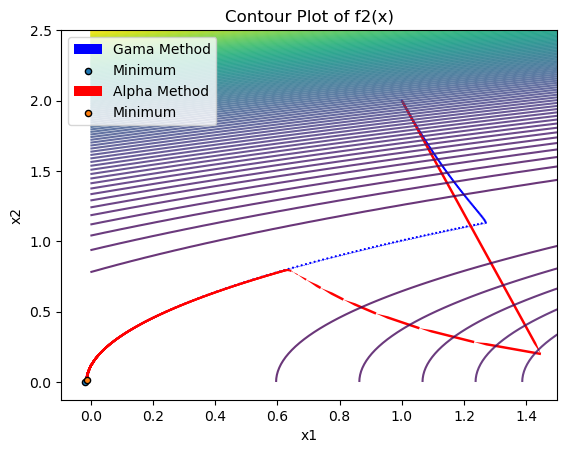

the minimum value with the given condtraints and conditions is:
3.9772812609715484


In [120]:
def plot_contour(a, b, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            Z[i, j] = f2(x)

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f2(x)')

# Example usage:
a_value = 2
b_value = 150
c = 0.01
alpha = 0.0005
x_vals = np.linspace(-0.001, 1.5, 100)
y_vals = np.linspace(0.001, 2.5, 100)

plot_contour(a_value, b_value, x_vals, y_vals, levels=100)
minimizer_f2_gama, values_f2_gama, x_history_f2_gama = gradient_descent_constant(f2 ,x0_2, 2000, 1,c)
plt.quiver(x_history_f2_gama[:-1, 0], x_history_f2_gama[:-1, 1], x_history_f2_gama[1:, 0] - x_history_f2_gama[:-1, 0], x_history_f2_gama[1:, 1] - x_history_f2_gama[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=1, label='Gama Method')
plt.scatter(minimizer_f2_gama[0], minimizer_f2_gama[1], s=20, label='Minimum', edgecolors='black')

minimizer_f2_alpha, values_f2_alpha, x_history_f2_alpha = gradient_descent_alpha(f2, x0_2, 2000, 0.1, alpha)
plt.quiver(x_history_f2_alpha[:-1, 0], x_history_f2_alpha[:-1, 1], x_history_f2_alpha[1:, 0] - x_history_f2_alpha[:-1, 0], x_history_f2_alpha[1:, 1] - x_history_f2_alpha[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='red', width=0.005, headwidth=1, label='Alpha Method')
plt.scatter(minimizer_f2_alpha[0], minimizer_f2_alpha[1], s=20, label='Minimum', edgecolors='black')



plt.legend()

plt.show()

print("the minimum value with the given condtraints and conditions is:")
print(np.min(values_f2_gama))

In [51]:
def gradient_descent_opt(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = c /np.linalg.norm(gradient(f, x, input_size))
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

In [69]:
import numpy as np

def calculate_hessian_at_point(function, point, epsilon=1e-5):
    """
    Calculate the Hessian matrix of a function at a specific point using numerical differentiation.

    Parameters:
    - function: The function for which to calculate the Hessian.
    - point: The point at which to evaluate the Hessian.
    - epsilon: The small value for numerical differentiation.

    Returns:
    - The Hessian matrix at the specified point.
    """
    dim = len(point)
    hessian_matrix = np.zeros((dim, dim))

    for i in range(dim):
        for j in range(dim):
            # Calculate second partial derivatives using central differences
            partial_i = np.gradient(np.gradient(function, axis=i), axis=j)
            hessian_matrix[i, j] = partial_i(point)

    return hessian_matrix

# Example function (replace with your own)
def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    return 0.5 * np.dot(x.T, np.dot(Q, x)) + np.dot(q.T, x) + p

# Point at which to evaluate the Hessian numerically
point_to_evaluate = np.array([1, 2])

# Calculate the Hessian matrix at the specified point
hessian_matrix_at_point = calculate_hessian_at_point(f1, point_to_evaluate)

# Display the result
print("Hessian Matrix at the specified point:")
print(hessian_matrix_at_point)


AxisError: axis 0 is out of bounds for array of dimension 0